In [1]:
# load dataset
import seaborn as sns

data = sns.load_dataset('titanic')

data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


5 data teratas:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Cek Dimensi:
 (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -----------

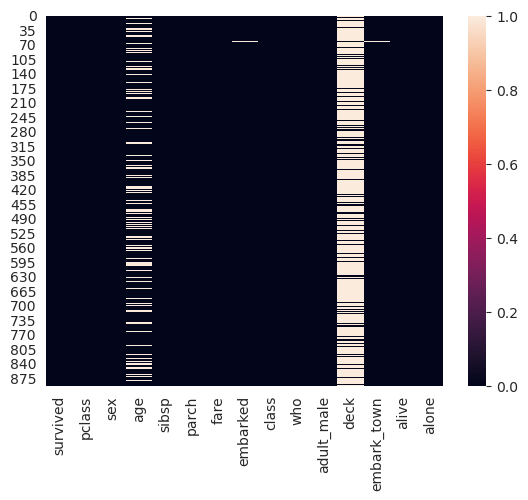

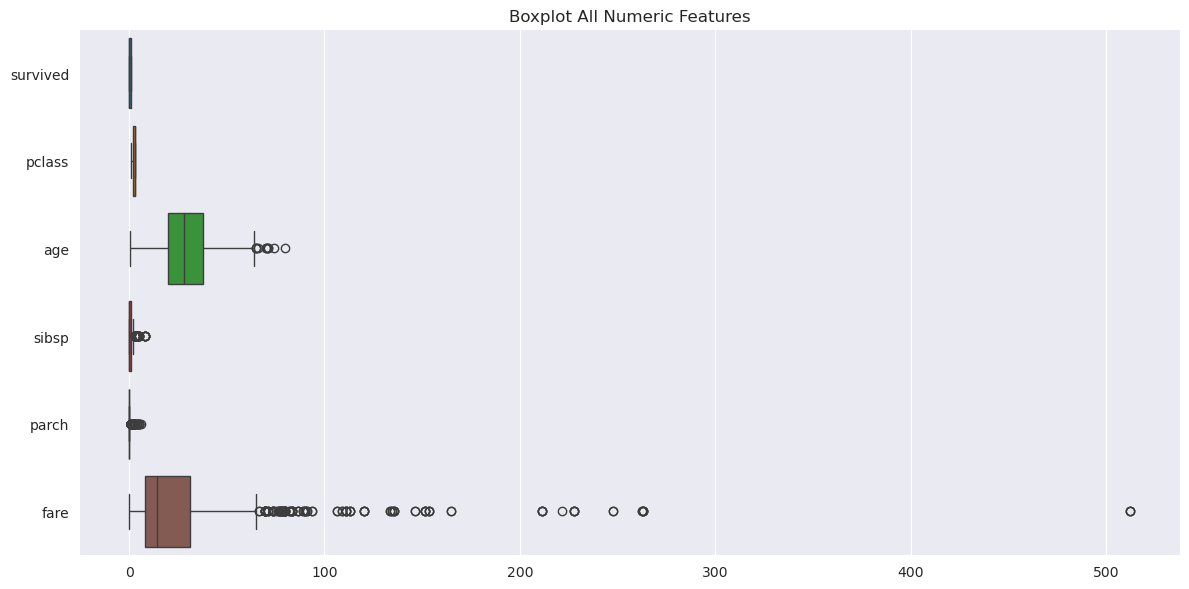

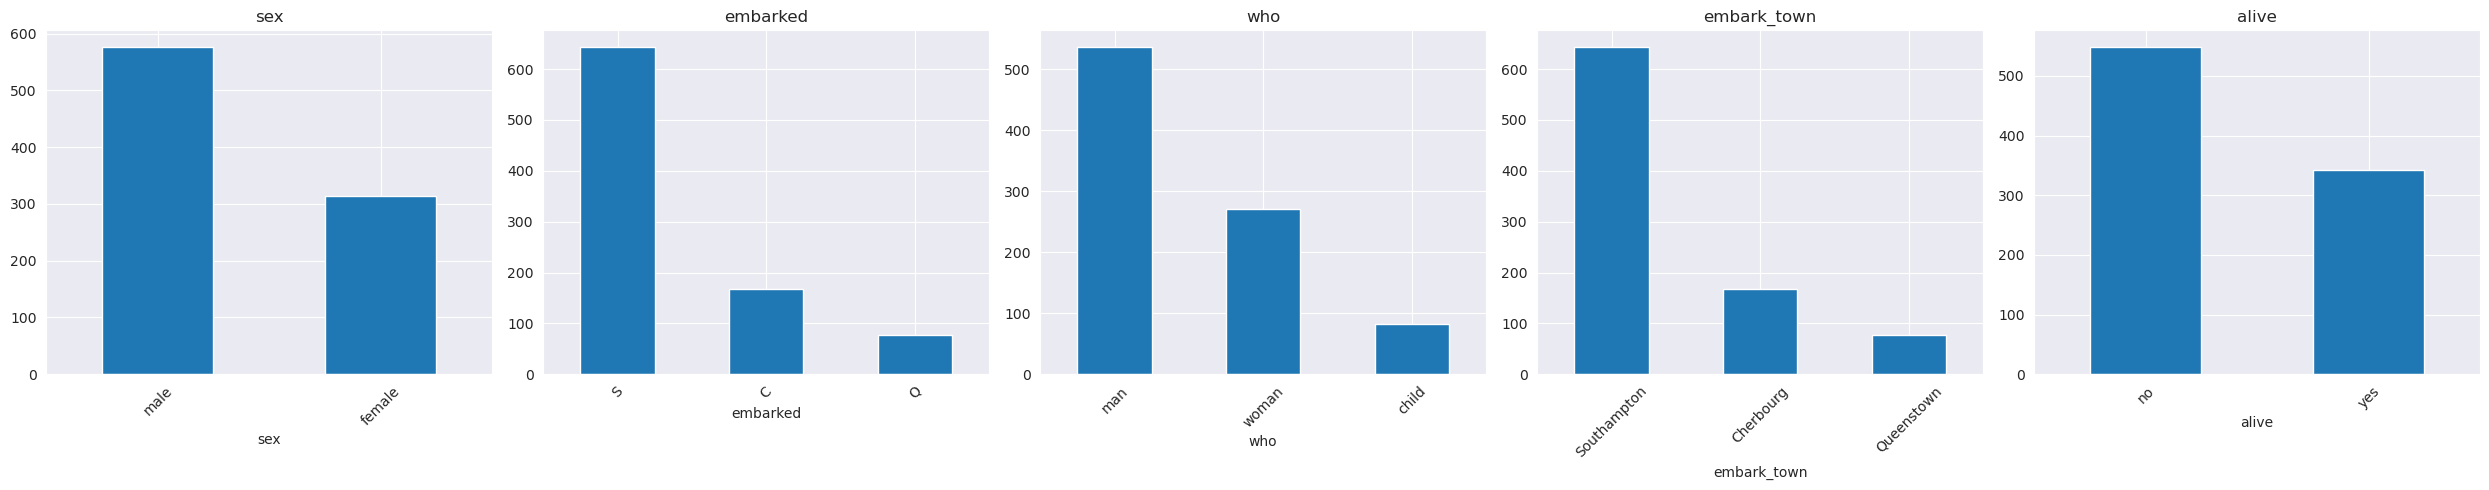

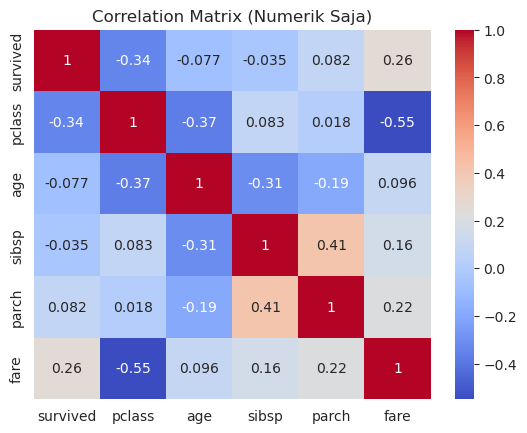

In [2]:
# EDA
print('5 data teratas:\n', data.head())

print('\nCek Dimensi:\n', data.shape)
print('\n', data.info())
print('\n', data.dtypes)

# Cek missing values
print(data.isnull().sum())
sns.heatmap(data.isnull())
print()

# Target Variable Analysis
data['alive'].value_counts()
data['alive'].value_counts(normalize=True)

# Distribusi Fitur numerik
import seaborn as sns

# Ambil kolom numerik
num_cols = data.select_dtypes(include='number').columns

import matplotlib.pyplot as plt
# Boxplot multiple kolom numerik sekaligus
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_cols], orient='h')
plt.title("Boxplot All Numeric Features")
plt.tight_layout()
plt.show()


# Distribusi Fitur Kategorical
# Ambil kolom kategorikal
cat_cols = data.select_dtypes(include='object').columns

# Subplot
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(5 * len(cat_cols), 5))

for ax, col in zip(axes, cat_cols):
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Cek Correlation Matrix (Numerik vs Target)

# ✅ 1. Ambil hanya kolom numerik
corr = data.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerik Saja)")
plt.show()

In [3]:
# Imputasi kolom age
data['age'] = data['age'].fillna(data['age'].median())

# Drop kolom deck (karena terlalu banyak kosong)
data = data.drop('deck', axis=1)

# drop kolom alive
data = data.drop('alive', axis=1)
# Imputasi embark_town dengan mode
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])


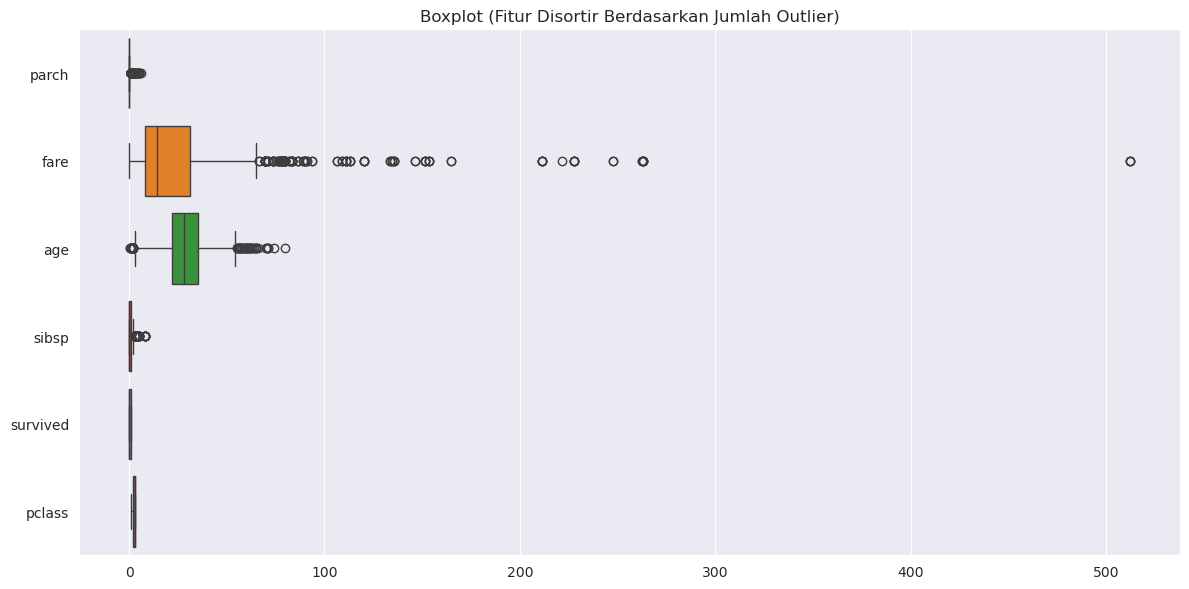

In [ ]:
# Cek outlier

# Hitung jumlah outlier per kolom (IQR)
iqr_outliers = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)
    iqr_outliers[col] = outlier_mask.sum()

# Urutkan kolom berdasarkan jumlah outlier
sorted_cols = sorted(iqr_outliers, key=iqr_outliers.get, reverse=True)

# Visualisasi boxplot fitur yang paling banyak outlier-nya di atas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[sorted_cols], orient='h', showfliers=True)
plt.title("Boxplot (Fitur Disortir Berdasarkan Jumlah Outlier)")
plt.tight_layout()
plt.show()


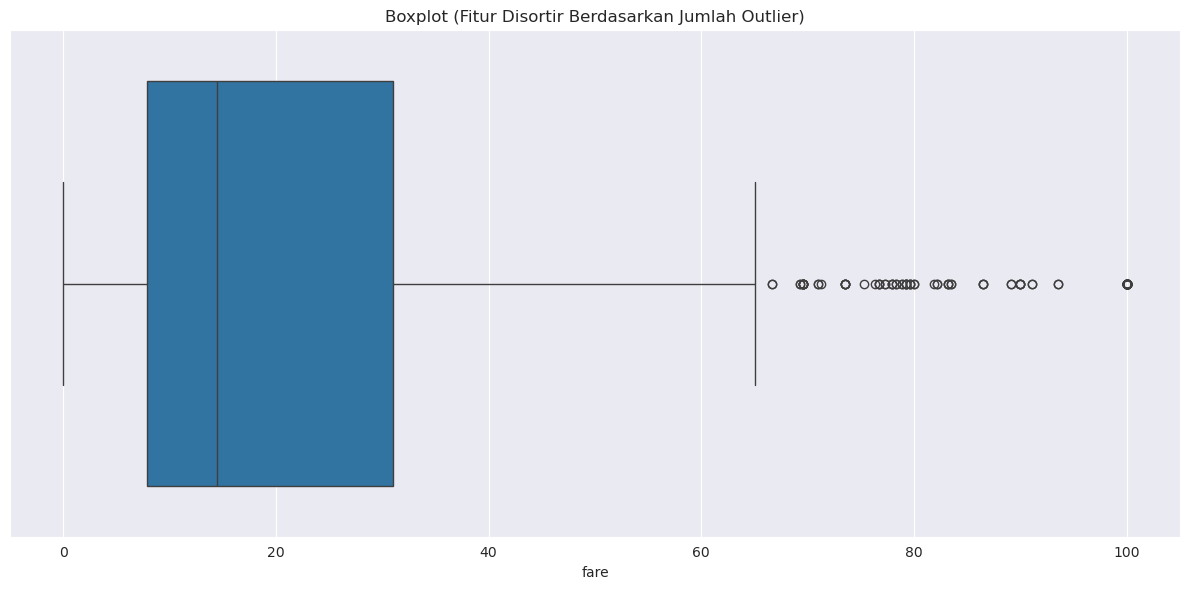

In [5]:
# handle outlier
import numpy as np
data['fare'] = np.clip(data['fare'], 0, 100)
data['age'] = np.clip(data['age'], 0, 100)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['fare'], orient='h', showfliers=True)
plt.title("Boxplot (Fitur Disortir Berdasarkan Jumlah Outlier)")
plt.tight_layout()
plt.show()


In [6]:
# Encoding

import pandas as pd
# Copy data dulu biar aman
data_encoded = data.copy()

# Buat encoding ke semua kolom object
data_encoded = pd.get_dummies(data_encoded, drop_first=True)  # drop_first biar nggak dummy trap

# Cek hasil
data_encoded.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,True,False,True,False,True,False,True,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,True,False,False,True,False,True,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True,False,False,False,True,False,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,True,False,True,True,False,False,True


In [7]:
# Split data
from sklearn.model_selection import train_test_split

X = data_encoded.drop('survived', axis=1)
y = data_encoded['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
# Modeling (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[95 15]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



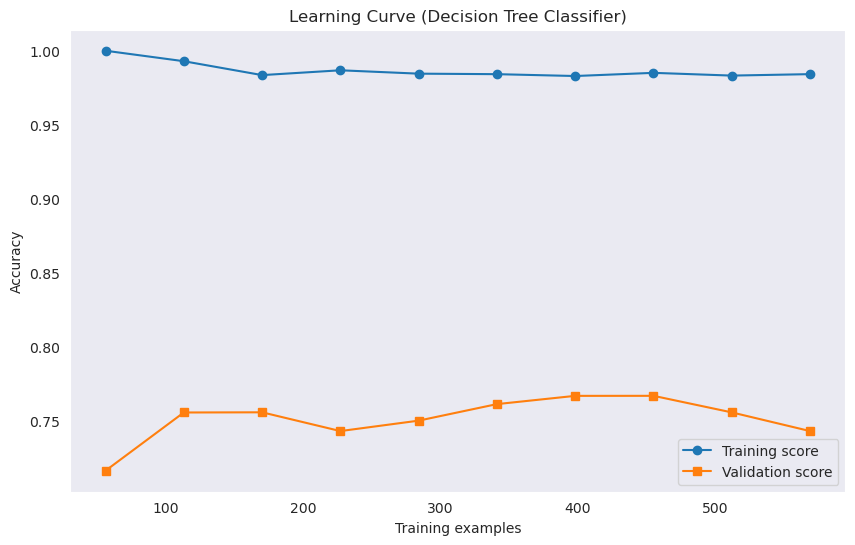

In [9]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',         # <- pakai accuracy (bukan R2!)
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Rata-ratain skor
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation score", marker='s')
plt.title("Learning Curve (Decision Tree Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()
